In [46]:
# pycharmでjupyter notebookを使う方法
# https://blog.jetbrains.com/ja/2019/11/30/2396/

import pandas as pd
import matplotlib.pyplot as plt
# ダークモードの場合、設定しないとメモリが見えなくなる
plt.style.use('dark_background')

import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from scipy.stats import poisson

In [3]:
df = pd.read_csv('data3a.csv')
df.describe()

,y,x
count,100.000000,100.000000
mean,7.830000,10.089100
std,2.624881,1.008049
min,2.000000,7.190000
25%,6.000000,9.427500
50%,8.000000,10.155000
75%,10.000000,10.685000
max,15.000000,12.400000


In [30]:
# y: 種子数
# x: 植物のサイズ
# f: C:肥料なし, T: 肥料あり(施肥[せひ]というらしい)

df.head()

SyntaxError: invalid syntax (<ipython-input-30-6d2c7b2240c4>, line 1)

In [5]:
# カテゴリが何件入っているか見る
df["f"].value_counts()

T    50
C    50
Name: f, dtype: int64

In [6]:
# 型確認
df.dtypes

y      int64
x    float64
f     object
dtype: object

<AxesSubplot:xlabel='x', ylabel='y'>

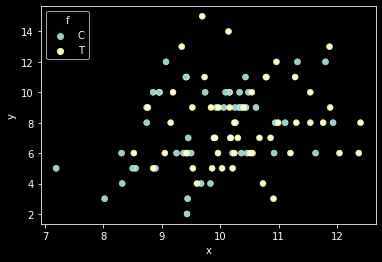

In [28]:
# 散布図
# https://engineeeer.com/pandas-dataframe-scatterplot/
sns.scatterplot(x='x', y='y', hue='f', data=df)

C         AxesSubplot(0.1,0.15;0.363636x0.75)
T    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

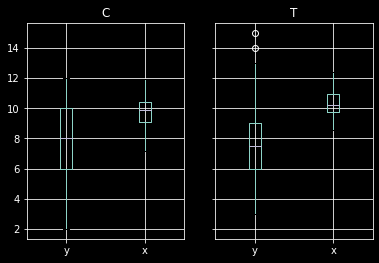

In [29]:
# 箱髭
df.groupby('f').boxplot()

<AxesSubplot:xlabel='x'>

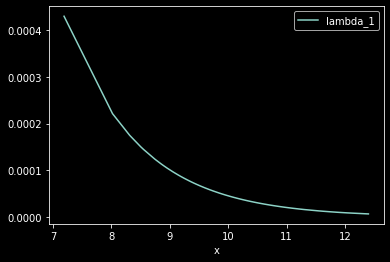

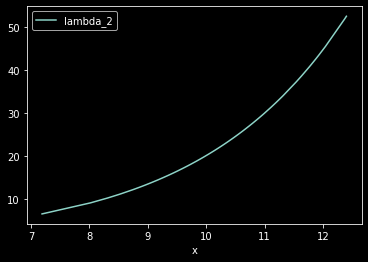

In [41]:
df_lambda = df.copy()
df_lambda['lambda_1'] = np.exp(-2 - 0.8 * df['x'])
df_lambda['lambda_2'] = np.exp(-1 + 0.4 * df['x'])
df_lambda = df_lambda.sort_values('x')
df_lambda.plot(x='x', y='lambda_1')
df_lambda.plot(x='x', y='lambda_2')

In [44]:
# https://engineeeer.com/statistical-modeling-greenbook-3b/
# interceptは切片B1, 説明変数xの係数は傾きB2に対応
# 最尤推定値はB1=1.29, B2=0.0757
# std.errorは標準誤差
# zはWald統計量と呼ばれ、最尤推定値/標準誤差。wald信頼区間と言うものが構成でき、推定値がゼロから十分に離れているかの目安らしい
fit_x = smf.poisson('y ~ x', data=df).fit()
fit_x.summary()

Optimization terminated successfully.
         Current function value: 2.353863
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sun, 20 Sep 2020   Pseudo R-squ.:                0.009497
Time:                        17:06:16   Log-Likelihood:                -235.39
converged:                       True   LL-Null:                       -237.64
Covariance Type:            nonrobust   LLR p-value:                   0.03362
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

In [47]:
# https://tnoda-journal.tumblr.com/page/3
# 最大対数尤度を求める
# これで合っているのか？あやしい
sum(poisson.logpmf(df.y, df.y))

-192.8897525244958